# Frequencies
This file contains code for breaking the brain data into frequency components

[u'TP9', u'FP1', u'FP2', u'TP10', u'n/a', u'n/a']
[u'C:\\Users\\gsteelman\\Desktop\\Neurotech']
[[478880]]
[[220]]
type 	deltatime 	time
0 100 	11 	11
1 100 	0.118184694377 	11.1181846944
2 149 	96.2332033186 	107.351388013
3 12 	88.0189482407 	195.370336254
Chunk extracted
4 151 	57.4247037147 	252.795039968
5 12 	92.4315845442 	345.226624513
Chunk extracted
6 149 	60.4002277316 	405.626852244
7 12 	89.4562879447 	495.083140189
Chunk extracted
8 151 	62.17706736 	557.260207549
9 12 	87.8711118063 	645.131319355
Chunk extracted
10 149 	60.5032967101 	705.634616065
11 12 	89.5613764977 	795.195992563
Chunk extracted
12 151 	60.0053969401 	855.201389503
13 12 	89.7576747042 	944.959064207
Chunk extracted
14 149 	61.0692645657 	1006.02832877
15 12 	89.2522025051 	1095.28053128
Chunk extracted
16 151 	59.8456611071 	1155.12619239
17 12 	84.1515301589 	1239.27772254
Chunk extracted
18 149 	66.8299283265 	1306.10765087
19 12 	82.2995678659 	1388.40721874
Chunk extracted
20 151 	66.8352170746

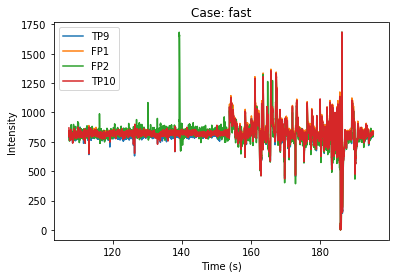

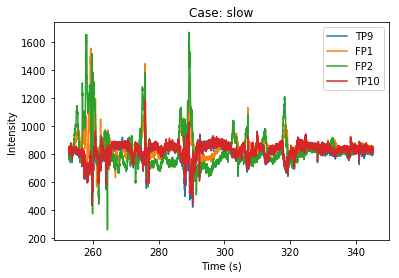

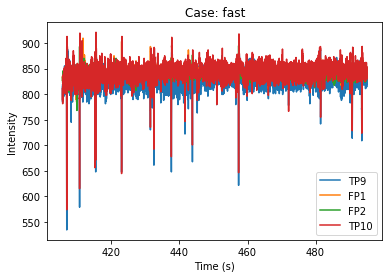

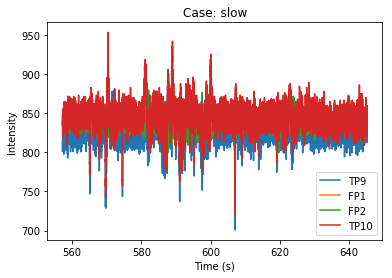

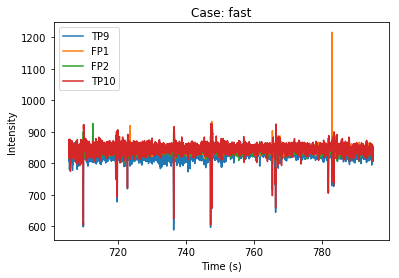

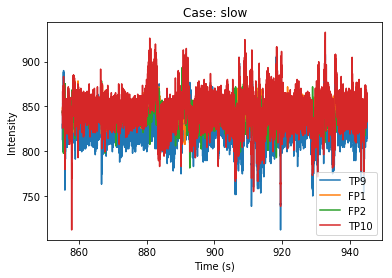

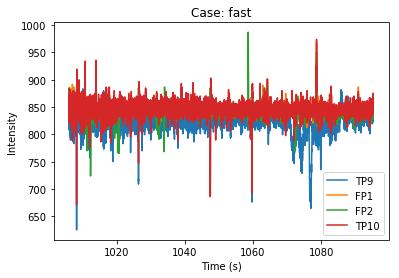

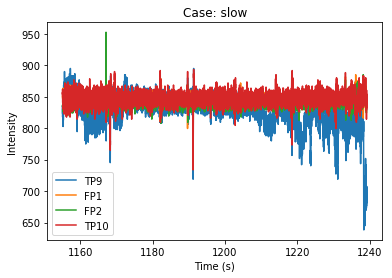

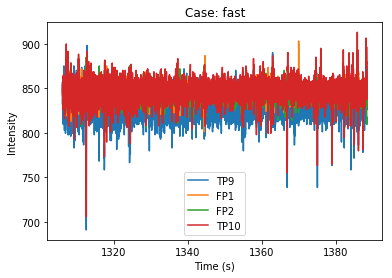

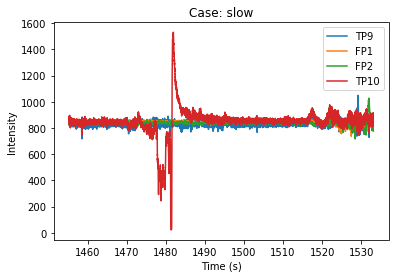

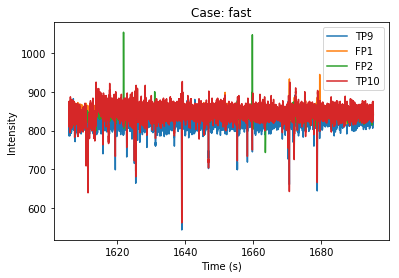

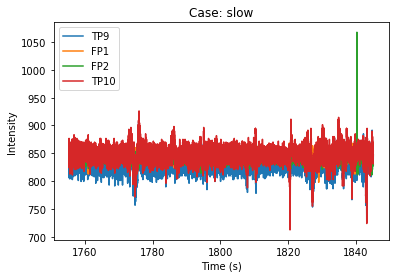

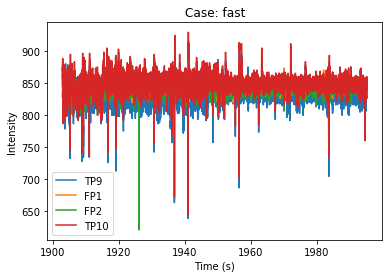

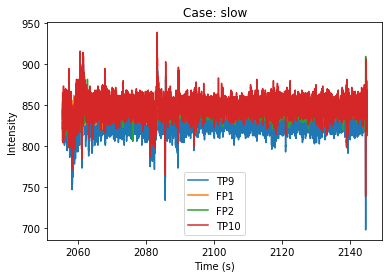

217


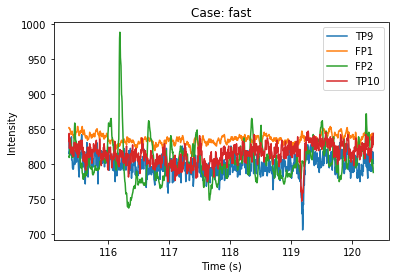

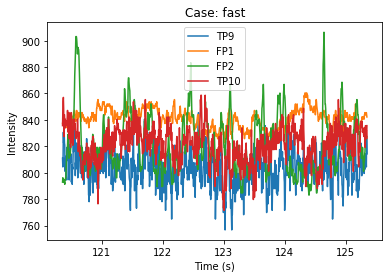

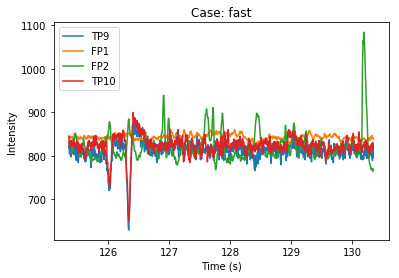

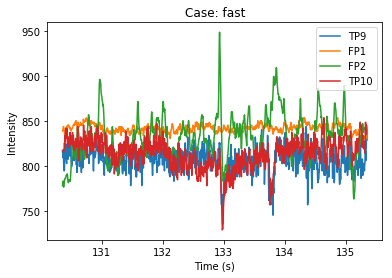

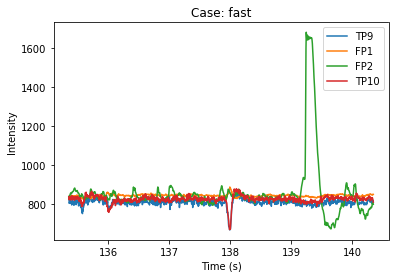

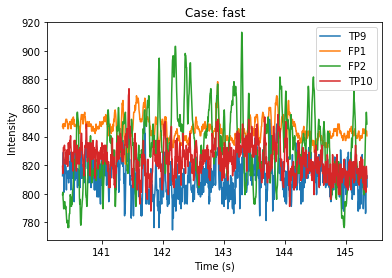

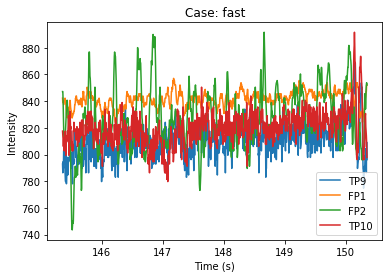

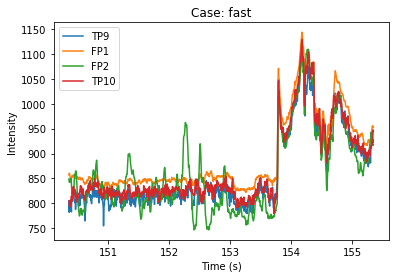

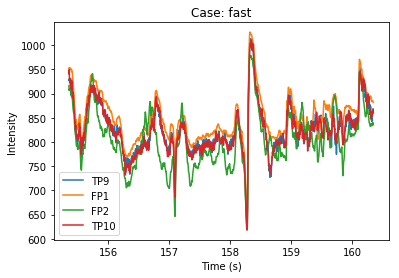

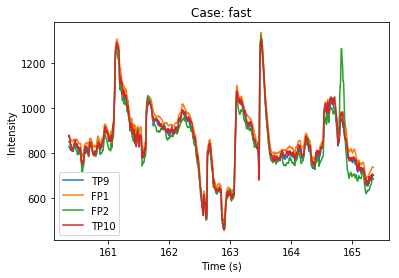

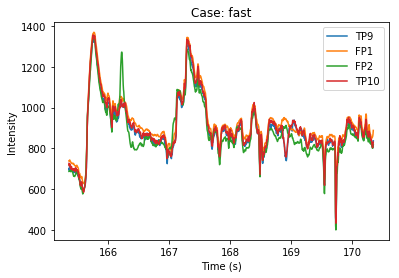

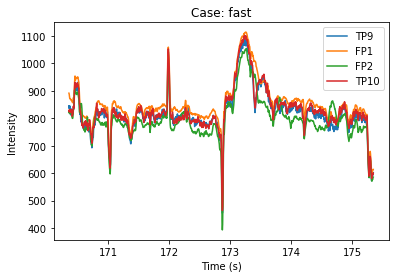

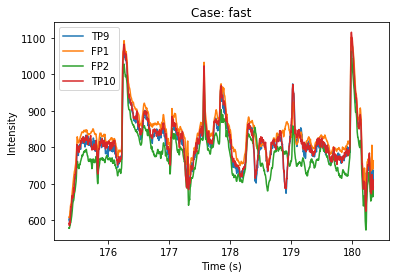

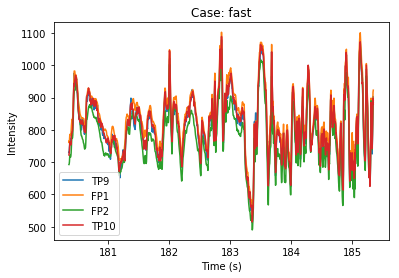

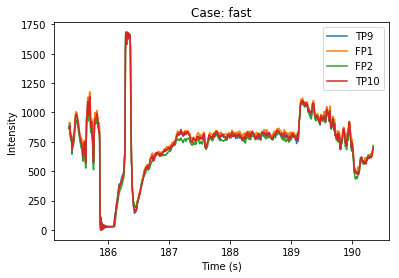

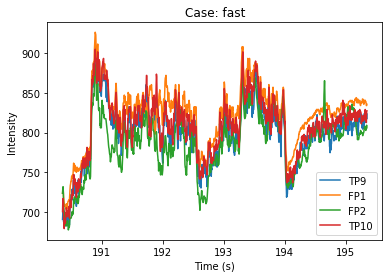

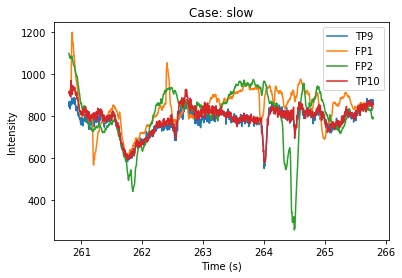

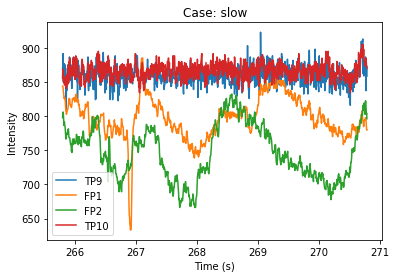

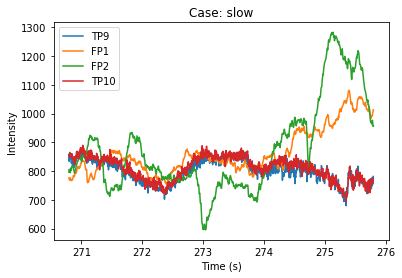

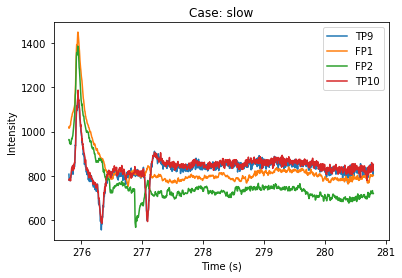

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import os
import scipy.stats
from scipy.integrate import trapz

%run 'preprocessing.ipynb'

In [5]:
df.tail()

,TP9,FP1,FP2,TP10,time
478875,379.990448,583.968018,807.685364,440.854736,2176.704545
478876,379.990448,478.689270,597.127869,388.215363,2176.709091
478877,485.269196,689.246765,755.045959,493.494110,2176.713636
478878,379.990448,689.246765,755.045959,440.854736,2176.718182
478879,485.269196,689.246765,860.324707,598.772827,2176.722727


In [8]:
avg_freq = pd.DataFrame()
avg_freq['FP1'] = np.fft.fft(df['FP1']) 
avg_freq['FP2'] = np.fft.fft(df['FP2'])
avg_freq['TP9'] = np.fft.fft(df['TP9'])
avg_freq['TP10'] = np.fft.fft(df['TP10'])

In [9]:
avg_freq.head()

,FP1,FP2,TP9,TP10
0,(405453128.026+0j),(399166873.334+0j),(397183553.319+0j),(403714161.399+0j)
1,(101200.337415+158855.290944j),(-1797063.99639+1112475.4944j),(-153093.907543+886195.470463j),(-1442210.59073+936991.12231j)
2,(-180536.510779-462628.663406j),(-1388345.22821+1054016.22199j),(-80652.5779954+756914.726852j),(-830970.455921+1197293.70982j)
3,(-49013.6919286-440228.0944j),(-501218.516911+1060246.81591j),(874805.126072+678023.491048j),(-354014.18826+1094287.98836j)
4,(-121604.373835+289484.099994j),(-242247.280723+1360306.61558j),(371706.138179+266231.952241j),(-77358.3303308+574097.219982j)


In [10]:
positive_data = np.array(avg_freq[:len(avg_freq)/2], dtype='int64')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


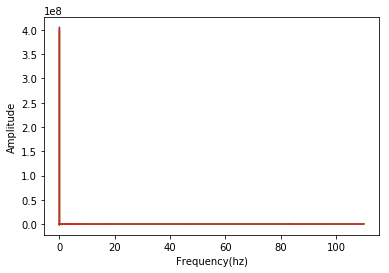

In [11]:
freq = np.transpose(np.array(range(len(positive_data)))/(len(avg_freq)/s['srate']))

plt.plot(freq, positive_data)
plt.xlabel('Frequency(hz)')
plt.ylabel('Amplitude')

In [12]:
# determine the total amplitude in the beta frequency range - characteristic of high engagement
beta_upper = int(math.ceil((len(freq))*6/s['srate']))
beta_lower = int(math.floor((len(freq))*2.4/s['srate']))

beta_amp = abs(trapz(positive_data[beta_lower:beta_upper]))
beta_amp


array([ 309103.5,  360981.5,  107220.5, ...,  109135.5,  172564.5,
        240954.5])

In [21]:
# determine the total amplitude in the alpha frequency range - characteristic of low engagement
alpha_upper = int(math.ceil((len(freq))*1.77/s['srate']))
alpha_lower = int(math.floor((len(freq))*0.9/s['srate']))

alpha_amp = abs(trapz(positive_data[alpha_lower:alpha_upper]))


In [22]:
# determine the total amplitude in the theta frequency range - characteristic of sleep/daydream
theta_upper = int(math.ceil((len(freq))*1.35/s['srate']))
theta_lower = int(math.floor((len(freq))*0.45/s['srate']))

theta_amp = abs(trapz(positive_data[theta_lower:theta_upper]))


In [23]:
# determine the total amplitude in the delta frequency range - characteristic of deepest sleep
delta_upper = int(math.ceil((len(freq))*0.6/s['srate']))
delta_lower = int(math.floor((len(freq))*0.22/s['srate']))

delta_amp = abs(trapz(positive_data[delta_lower:delta_upper]))


In [24]:
def plotFFT(df):
    avg_freq = (np.fft.fft(df['FP1']) + np.fft.fft(df['FP2']) + np.fft.fft(df['TP9']) + np.fft.fft(df['TP10']))/4
    positive_data = np.array(np.absolute(avg_freq[:len(avg_freq)/2]))
    
    freq = np.transpose(np.array(range(len(positive_data)))/(len(avg_freq)/s['srate']))
    
    plt.plot(freq[10:], positive_data[10:])
    plt.xlabel('Frequency(hz)')
    plt.ylabel('Amplitude')

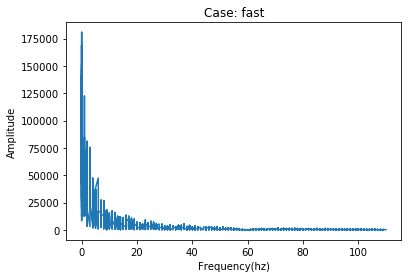

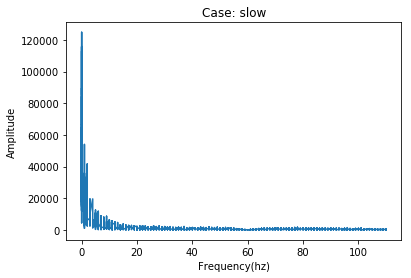

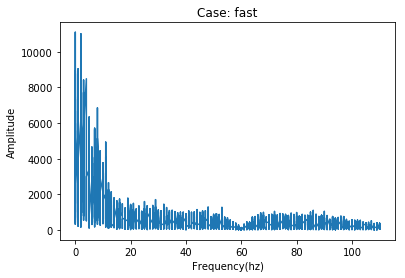

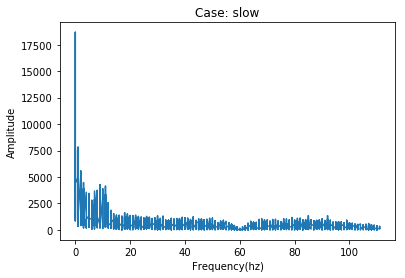

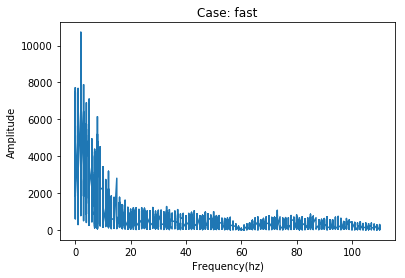

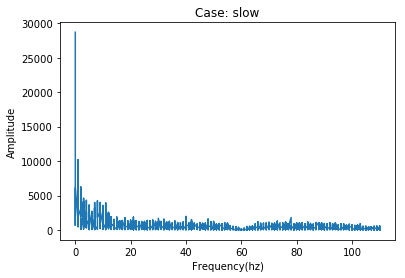

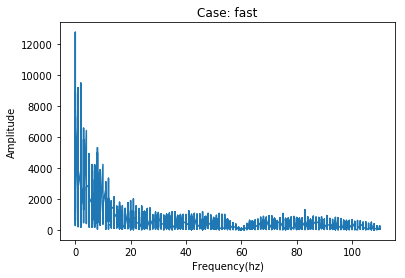

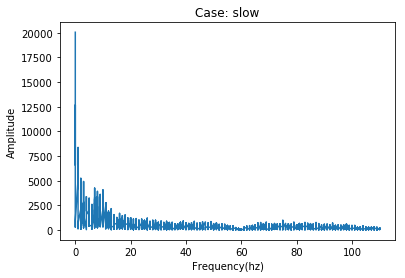

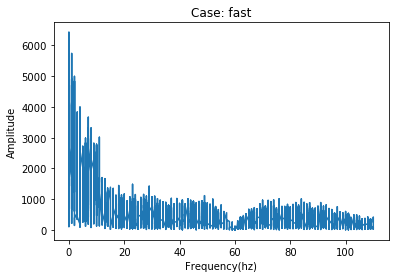

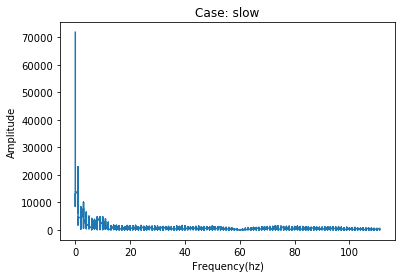

In [25]:
for _, row in zip(range(10), chunks.itertuples()):
    plotFFT(row.data)
    plt.title('Case: '+row.case)
    plt.show()

In [29]:
def waveAmps(df):
    waves=[]
    
    # calculate the FFT
    avg_freq = pd.DataFrame()
    avg_freq['FP1'] = np.fft.fft(df['FP1']) 
    avg_freq['FP2'] = np.fft.fft(df['FP2'])
    avg_freq['TP9'] = np.fft.fft(df['TP9'])
    avg_freq['TP10'] = np.fft.fft(df['TP10'])    
    positive_data = np.array(np.absolute(avg_freq[:len(avg_freq)/2]))
    freq = np.transpose(np.array(range(len(positive_data)))/(len(avg_freq)/srate))
    
    # determine the total amplitude in the beta frequency range - characteristic of high engagement
    beta_upper = int(math.ceil((len(freq))*6/s['srate']))
    beta_lower = int(math.floor((len(freq))*2.4/s['srate']))
    beta_amp = trapz(positive_data[beta_lower:beta_upper])/len(positive_data)

    # determine the total amplitude in the alpha frequency range - characteristic of low engagement
    alpha_upper = int(math.ceil((len(freq))*1.77/s['srate']))
    alpha_lower = int(math.floor((len(freq))*0.9/s['srate']))
    alpha_amp = trapz(positive_data[alpha_lower:alpha_upper])/len(positive_data)

    # determine the total amplitude in the theta frequency range - characteristic of sleep/daydream
    theta_upper = int(math.ceil((len(freq))*1.35/s['srate']))
    theta_lower = int(math.floor((len(freq))*0.45/s['srate']))
    theta_amp = trapz(positive_data[theta_lower:theta_upper])/len(positive_data)

    # determine the total amplitude in the delta frequency range - characteristic of deepest sleep
    delta_upper = int(math.ceil((len(freq))*0.6/s['srate']))
    delta_lower = int(math.floor((len(freq))*0.22/s['srate']))
    delta_amp = trapz(positive_data[delta_lower:delta_upper])/len(positive_data)

    waves = np.append(waves, [beta_amp, alpha_amp, theta_amp, delta_amp], axis=0)
    return waves

In [30]:
uchunks['waveAmps']=[waveAmps(row.data) for row in uchunks.itertuples()]
uchunks.head(10)

,case,end_time,start_time,duration,data,length,waveAmps
0,fast,120.351388,115.351388,5.0,TP9 FP1 FP2 ...,1100,"[[12.3571255903, 13.2745584928, 10.6121094917,..."
1,fast,125.351388,120.351388,5.0,TP9 FP1 FP2 ...,1100,"[[12.4629277248, 7.70879870235, 7.61130631377,..."
2,fast,130.351388,125.351388,5.0,TP9 FP1 FP2 ...,1100,"[[21.8577329569, 10.06365538, 13.5180633903, 8..."
3,fast,135.351388,130.351388,5.0,TP9 FP1 FP2 ...,1100,"[[9.99298357843, 12.4707005195, 8.54921585814,..."
4,fast,140.351388,135.351388,5.0,TP9 FP1 FP2 ...,1100,"[[63.3687914121, 71.8651344631, 76.7992085136,..."
5,fast,145.351388,140.351388,5.0,TP9 FP1 FP2 ...,1100,"[[6.71677828907, 9.39719905007, 8.16395350744,..."
6,fast,150.351388,145.351388,5.0,TP9 FP1 FP2 ...,1100,"[[9.9752048722, 10.1896284445, 6.30779267696, ..."
7,fast,155.351388,150.351388,5.0,TP9 FP1 FP2 ...,1100,"[[44.2574695962, 33.4358007184, 30.2380753801,..."
8,fast,160.351388,155.351388,5.0,TP9 FP1 FP2 ...,1100,"[[71.2959470198, 19.3468631167, 66.6462144269,..."
9,fast,165.351388,160.351388,5.0,TP9 FP1 FP2 ...,1100,"[[64.3998187417, 144.727019668, 93.816055577, ..."


In [28]:
chunks['waveAmps']=[waveAmps(row.data) for row in chunks.itertuples()]
chunks.head(10)

,case,end_time,start_time,duration,data,length,waveAmps
0,fast,195.370336,107.351388,88.018948,TP9 FP1 FP2 ...,19364,"[780.355147044, 305.407989822, 281.773772233, ..."
1,slow,345.226625,252.795040,92.431585,TP9 FP1 FP2 ...,20335,"[279.353495096, 155.158657261, 216.923367252, ..."
2,fast,495.083140,405.626852,89.456288,TP9 FP1 FP2 ...,19681,"[63.8820841356, 13.9670464538, 17.6132645694, ..."
3,slow,645.131319,557.260208,87.871112,TP9 FP1 FP2 ...,19331,"[42.7785487036, 19.5565318465, 22.438244388, 1..."
4,fast,795.195993,705.634616,89.561376,TP9 FP1 FP2 ...,19704,"[63.5695462181, 12.1158624273, 12.1298484523, ..."
5,slow,944.959064,855.201390,89.757675,TP9 FP1 FP2 ...,19746,"[46.275225567, 21.3582089463, 26.1263072981, 1..."
6,fast,1095.280531,1006.028329,89.252203,TP9 FP1 FP2 ...,19635,"[54.6344720283, 17.4453083403, 21.721521396, 7..."
7,slow,1239.277723,1155.126192,84.151530,TP9 FP1 FP2 ...,18514,"[38.0823072007, 17.33077914, 26.0972433664, 17..."
8,fast,1388.407219,1306.107651,82.299568,TP9 FP1 FP2 ...,18106,"[39.3078034511, 9.97812495055, 8.36680162786, ..."
9,slow,1533.066277,1455.242436,77.823841,TP9 FP1 FP2 ...,17121,"[116.939974532, 86.5796338781, 105.588918195, ..."
